<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/09.6-Plot_a_Density_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

[default]
circuit_drawer = mpl
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/QC


References:
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_city.html
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_hinton.html
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_state_paulivec.html
* https://so.ilitchbusiness.wayne.edu/knowledge/what-can-i-do-with-qiskit-visualization
* https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

## Plot state (using state vector or density matrix)


### Using a State city plot

DensityMatrix([[0.5       +0.j        , 0.        +0.j        ,
                0.        +0.j        , 0.35355339-0.35355339j],
               [0.        +0.j        , 0.        +0.j        ,
                0.        +0.j        , 0.        +0.j        ],
               [0.        +0.j        , 0.        +0.j        ,
                0.        +0.j        , 0.        +0.j        ],
               [0.35355339+0.35355339j, 0.        +0.j        ,
                0.        +0.j        , 0.5       +0.j        ]],
              dims=(2, 2))


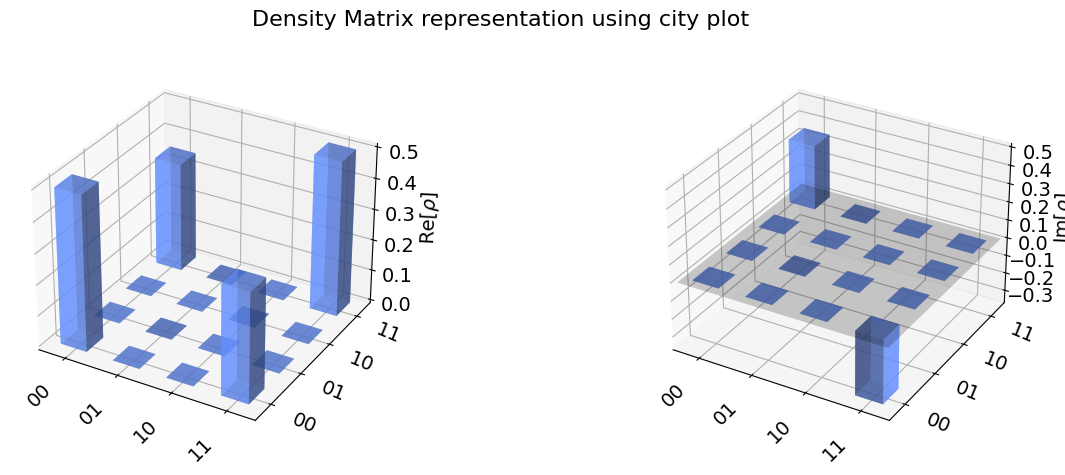

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h([0])
qc.p(np.pi/4, 0)
qc.cx(0,1)

dm = DensityMatrix(qc)
print(dm)
plot_state_city(qc, alpha=0.6, title="Density Matrix representation using city plot")

DensityMatrix([[0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j],
               [0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j, 0.125+0.j,
                0.125+0.j, 0.125+0.j, 0.125+0.j]],
              dims=(2, 2, 2))


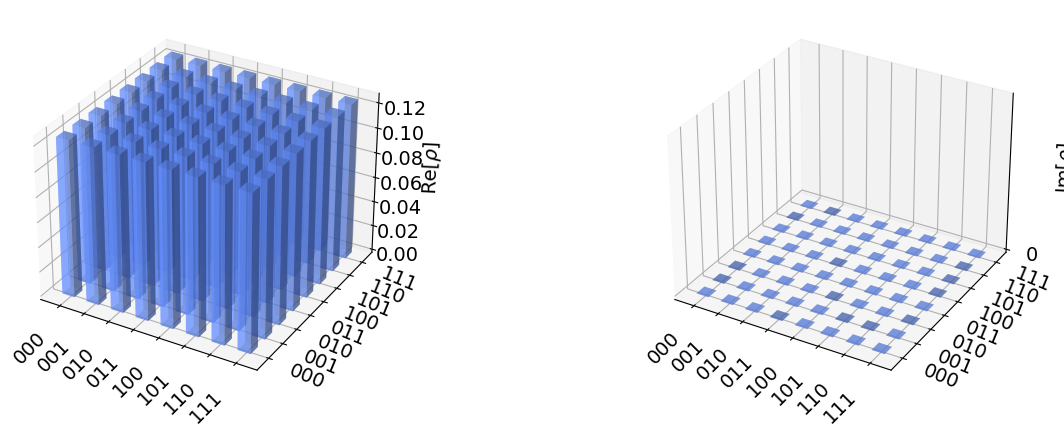

In [ ]:
# Differently from bloch sphere, the qsphere can represent entangled states
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

qr = QuantumRegister(3, "qbits")
qc = QuantumCircuit(qr)
qc.h(qr)

sv = Statevector(qc)
print(DensityMatrix(sv))
plot_state_city(sv, alpha=0.5)

### Using a Hinton plot
The hinton diagram represents the values of a matrix using squares, whose size indicate the magnitude of their corresponding value and their color, its sign.

A white square means the value is positive and a black one means negative, grey one means 0.

DensityMatrix([[0.5 +0.j       , 0.  +0.j       , 0.  +0.j       ,
                0.25-0.4330127j],
               [0.  +0.j       , 0.  +0.j       , 0.  +0.j       ,
                0.  +0.j       ],
               [0.  +0.j       , 0.  +0.j       , 0.  +0.j       ,
                0.  +0.j       ],
               [0.25+0.4330127j, 0.  +0.j       , 0.  +0.j       ,
                0.5 +0.j       ]],
              dims=(2, 2))


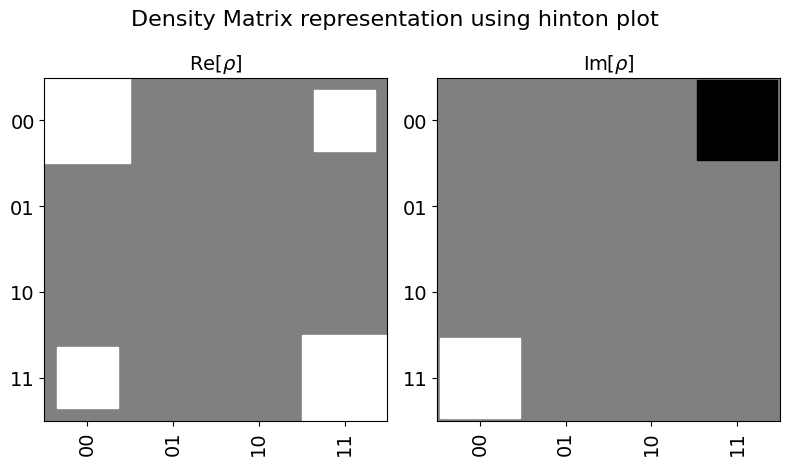

In [ ]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_hinton
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(2)
qc.h([0])
qc.p(np.pi/3, 0)
qc.cx(0,1)

dm = DensityMatrix(qc)
print(dm)
plot_state_hinton(qc, title="Density Matrix representation using hinton plot")

### Using plot_state_paulivec
Plot a bargraph of the density matrix of a quantum state using as a basis all possible tensor products of Pauli operators and identities

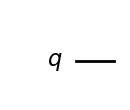

DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))


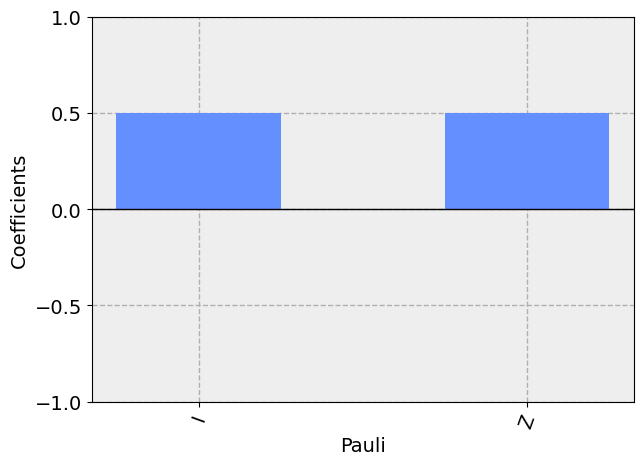

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_paulivec

qc = QuantumCircuit(1)

display(qc.draw())

dm = DensityMatrix(qc)
print(dm)
plot_state_paulivec(dm)

Just an example to get a backend

In [ ]:
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_quito")